In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

newparams = {'figure.figsize': (12, 6), 'axes.grid': False,
             'lines.linewidth': 2,
             'font.size': 15, 'mathtext.fontset': 'stix',
             'font.family': 'STIXGeneral'}

plt.rcParams.update(newparams)

Sluttvinkel: 48.2


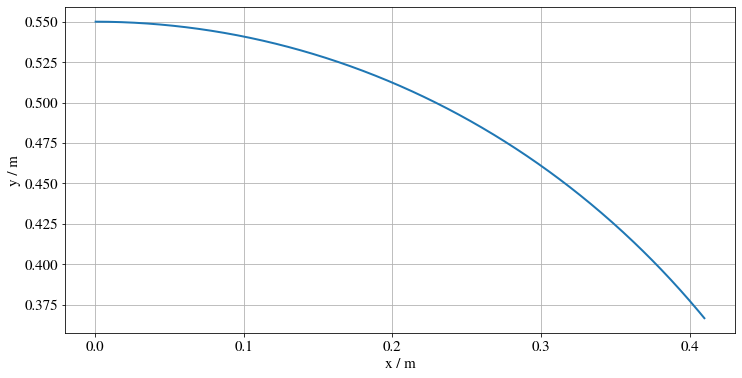

In [10]:
#Oppgave 1

r = 0.05             #[m] Avstanden fra banen opp til massesenter av objektet
R = 0.5              #[m] Radius til banen
m = 0.1              #[kg] Massen til objektet
g = 9.81             #[m/s^2] Gravitasjonsakselerasjonen
dt = 0.001           #[s] tidssteg for eulers metode
theta0 = 0.001        #[rad] Slippvinkel for objektet (større enn null, ellers ville det ha stått i ro på toppen)


#Funskjon som regner ut den analytiske hastigheten ved en vinkel langs banen, og returnerer denne. [m/s].
#Parametre:
#theta: [rad] vinkelen objeket befinner seg ved. theta=0 settes for toppen av banen
#theta0: [rad] vinkelen objektet slippes fra
#g: [m/s^2] Gravitasjonsakselerasjonen
#R: [m] Radius til banen
def v(theta, theta0, g, R):
    return np.sqrt(2*g*(R+r)*(np.cos(theta0) - np.cos(theta)))


#Funksjon som regner ut normalkraften fra banen på objektet ved en vinkel langs banen og returnerer denne [N].  
#Parametre:
#theta: [rad] vinkelen objeket befinner seg ved. theta=0 settes for toppen av banen
#theta0: [rad] vinkelen objektet slippes fra
#g: [m/s^2] Gravitasjonsakselerasjonen
#R: [m] Radius til banen
def N(theta, theta0, m, g):
    return m*g*(3*np.cos(theta) - 2*np.cos(theta0))


#Funksjon som regner ut analytisk vinkelen som objektet faller av banen ved, og returnerer denn [rad].
#Parametre:
#theta0: [rad] vinkelen objektet slippes fra
def theta_crit(theta0):
    return np.arccos(2/3 * np.cos(theta0))


#Funksjon som regner ut ett skritt av eulers metode for ligningssystemet til denne oppgaven, og legger til verdiene i lister
#Parametre:
#g: [m/s^2] Gravitasjonsakselerasjonen
#R: [m] Radius til banen
#r: [m] avstanden fra banen til massesenteret til objektet
#ts: liste med tidsverdier
#thetas: liste med vinkler
#dt: [s] tidssteg for denne iterasjonen
#ws: liste med vinkelhastigheter
def euler_step(ts, dt, g, thetas, r, R, ws):
    ts.append(ts[-1] + dt)
    ws.append(ws[-1] + g*np.sin(thetas[-1])/(r+R)*dt)
    thetas.append(thetas[-1] + ws[-2]*dt)
    

#Funksjon som regner ut tid, vinkelhastighet og vinkel til denne oppgaven ved hjelp av eulers metode.
#Returnerer: liste med vinkler [rad], liste med vinkelhastigheter [rad/s], liste med tidspunkt [s]
#Parametre:
#dt: [s] tidssteg
#g: [m/s^2] Gravitasjonsakselerasjonen
#R: [m] Radius til banen
#r: [m] avstanden fra banen til massesenteret til objektet
#theta0: [rad] vinkelen objektet slippes fra
def euler(dt, g, r, R, theta0):
    ts = [0]
    ws = [0]
    thetas = [theta0]
    while(N(thetas[-1], theta0, m, g) > 0):
        euler_step(ts, dt, g, thetas, r, R, ws)
        
    return np.array(thetas), np.array(ws), np.array(ts)

#Bruker Eulers metode til å finne vinkel, vinkelhastighet og tid for objektet langs banen
thetas, ws, ts = euler(dt, g, r, R, theta0)


#Finner x-posisjon, y-posisjon og hastihet fra den numeriske løsningen
xs = (R+r)*np.sin(thetas)
ys = (r+R)*np.cos(thetas)
vs = (R+r)*ws



#Finner analytisk hastihet og vinkler
theta_analytic = np.linspace(theta0, theta_crit(theta0), 100)
v_analytic = v(theta_analytic, theta0, g, R)


#Regner ut numerisk og analytisk mekansik energi
E_num = 1/2 * m * vs**2 + m*g*(R+r)*np.cos(thetas)
E_analytic = 1/2 * m * v_analytic**2 + m*g*(R+r)*np.cos(theta_analytic)

print(f"Sluttvinkel: {thetas[-1]*180/np.pi:.03}")
plt.plot(xs, ys)
plt.xlabel("x / m")
plt.ylabel("y / m")
plt.grid()
plt.show()

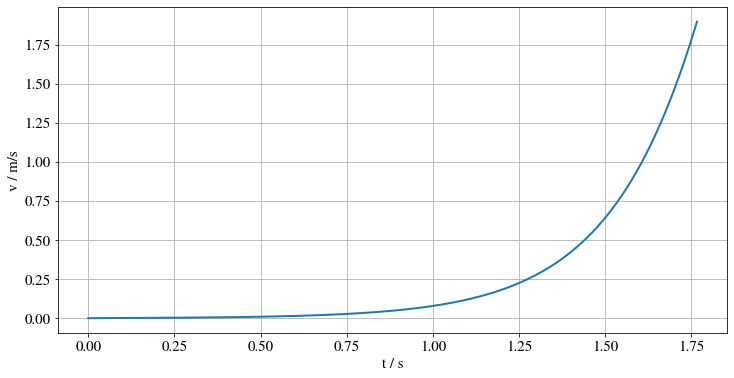

In [78]:
plt.plot(ts, vs)
plt.xlabel("t / s")
plt.ylabel("v / m/s")
plt.grid()
plt.show()

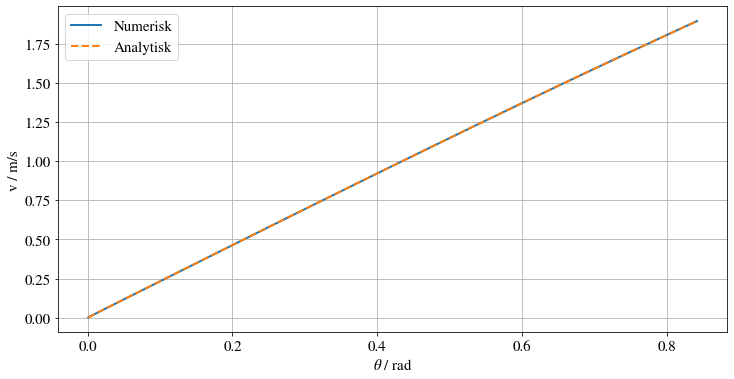

In [79]:
plt.plot(thetas, vs, label="Numerisk")
plt.plot(theta_analytic, v_analytic, "--", label = "Analytisk")
plt.xlabel(r"$\theta$ / rad")
plt.ylabel("v / m/s")
plt.legend()
plt.grid()

In [80]:
print(vs[-1])

1.8969110260826423


Text(0, 0.5, 'E / J')

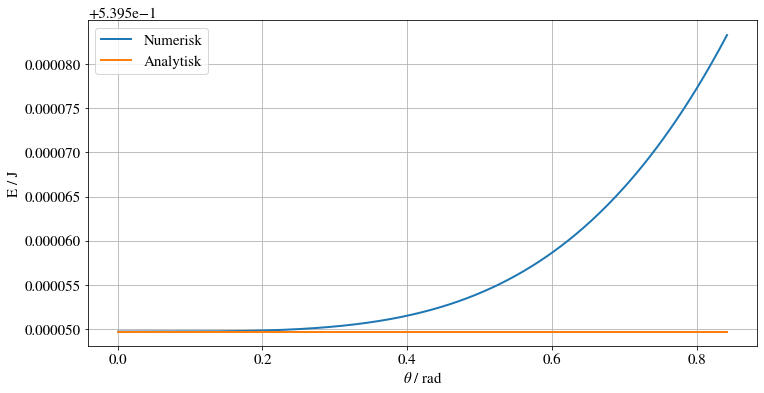

In [81]:
plt.plot(thetas, E_num, label ="Numerisk")
plt.plot(theta_analytic, E_analytic, label="Analytisk")
plt.legend()
plt.grid()
plt.xlabel(r"$\theta$ / rad")
plt.ylabel("E / J")

Sluttvinkel: 54.0


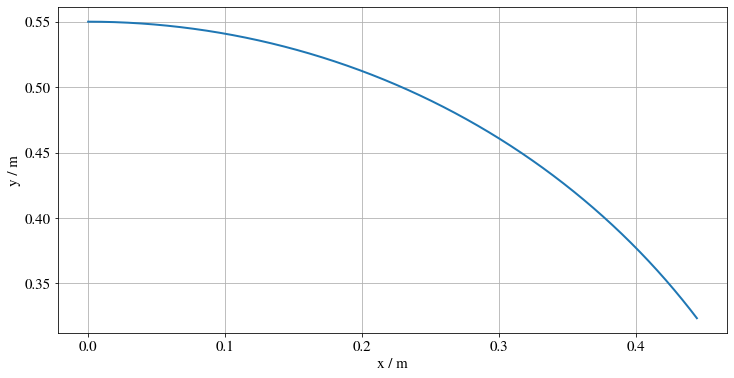

In [88]:
#Oppgave 2


r = 0.05             #[m] Avstanden fra banen opp til massesenter av objektet
R = 0.5              #[m] Radius til banen
m = 0.1              #[kg] Massen til objektet
g = 9.81             #[m/s^2] Gravitasjonsakselerasjonen
dt = 0.0001           #[s] tidssteg for eulers metode
theta0 = 0.0001        #[rad] Slippvinkel for objektet (større enn null, ellers ville det ha stått i ro på toppen)
c = 2/5              #Konstant bestemt av treghetsmomentet gjennom massesenteret til objektet. 



#Funskjon som regner ut den analytiske hastigheten ved en vinkel langs banen, og returnerer denne. [m/s].
#Parametre:
#theta: [rad] vinkelen objeket befinner seg ved. theta=0 settes for toppen av banen
#theta0: [rad] vinkelen objektet slippes fra
#g: [m/s^2] Gravitasjonsakselerasjonen
#R: [m] Radius til banen
def v(theta, theta0, g, R, r):
    return np.sqrt(2*g*(R+r)*(np.cos(theta0) - np.cos(theta))/(1+c))


#Funksjon som regner ut normalkraften fra banen på objektet ved en vinkel langs banen og returnerer denne [N].  
#Parametre:
#theta: [rad] vinkelen objeket befinner seg ved. theta=0 settes for toppen av banen
#theta0: [rad] vinkelen objektet slippes fra
#g: [m/s^2] Gravitasjonsakselerasjonen
#R: [m] Radius til banen
#c: Konstant bestemt av treghetsmomentet gjennom massesenteret til objektet.
def N(theta, theta0, m, g, c):
    return m*g*((1+2/(1+c))*np.cos(theta) - 2/(1+c)*np.cos(theta0))


#Funksjon som regner ut analytisk vinkelen som objektet faller av banen ved, og returnerer denn [rad].
#Parametre:
#theta0: [rad] vinkelen objektet slippes fra
#c: Konstant bestemt av treghetsmomentet gjennom massesenteret til objektet.
def theta_crit(theta0, c):
    return np.arccos(2/(3+c) * np.cos(theta0))


#Funksjon som regner ut ett skritt av eulers metode for ligningssystemet til denne oppgaven, og legger til verdiene i lister
#Parametre:
#g: [m/s^2] Gravitasjonsakselerasjonen
#R: [m] Radius til banen
#r: [m] avstanden fra banen til massesenteret til objektet
#ts: liste med tidsverdier
#thetas: liste med vinkler
#dt: [s] tidssteg for denne iterasjonen
#ws: liste med vinkelhastigheter
#c: Konstant bestemt av treghetsmomentet gjennom massesenteret til objektet.
def euler_step(ts, dt, g, thetas, r, R, ws, c):
    ts.append(ts[-1] + dt)
    ws.append(ws[-1] + g*np.sin(thetas[-1])/((1+c)*(r+R))*dt)
    thetas.append(thetas[-1] + ws[-2]*dt)
    
    
    
#Funksjon som regner ut tid, vinkelhastighet og vinkel til denne oppgaven ved hjelp av eulers metode.
#Returnerer: liste med vinkler [rad], liste med vinkelhastigheter [rad/s], liste med tidspunkt [s]
#Parametre:
#dt: [s] tidssteg
#g: [m/s^2] Gravitasjonsakselerasjonen
#R: [m] Radius til banen
#r: [m] avstanden fra banen til massesenteret til objektet
#theta0: [rad] vinkelen objektet slippes fra
#c: Konstant bestemt av treghetsmomentet gjennom massesenteret til objektet.
def euler(dt, g, r, R, theta0, c):
    ts = [0]
    ws = [0]
    thetas = [theta0]
    while(N(thetas[-1], theta0, m, g, c) > 0):
        euler_step(ts, dt, g, thetas, r, R, ws, c)
        
    return np.array(thetas), np.array(ws), np.array(ts)


#Bruker Eulers metode til å finne vinkel, vinkelhastighet og tid for objektet langs banen
thetas, ws, ts = euler(dt, g, r, R, theta0, c)

#Finner x-posisjon, y-posisjon og hastihet fra den numeriske løsningen
xs = (R+r)*np.sin(thetas)    
ys = (r+R)*np.cos(thetas)
vs = (R+r)*ws

#Finner analytisk hastihet og vinkler
theta_analytic = np.linspace(theta0, theta_crit(theta0, c),100)
v_analytic = v(theta_analytic, theta0, g, R, r)

#Regner ut numerisk og analytisk mekansik energi
E_num = 1/2 * m * ((1+c) * vs**2 + 2*g*(R+r)*np.cos(thetas))
E_analytic = 1/2 * m* ((1+c)*v_analytic**2 + 2*g*(R+r)*np.cos(theta_analytic))

print(f"Sluttvinkel: {thetas[-1]*180/np.pi:.03}")
plt.plot(xs, ys)
plt.xlabel("x / m")
plt.ylabel("y / m")
plt.grid()
plt.show()

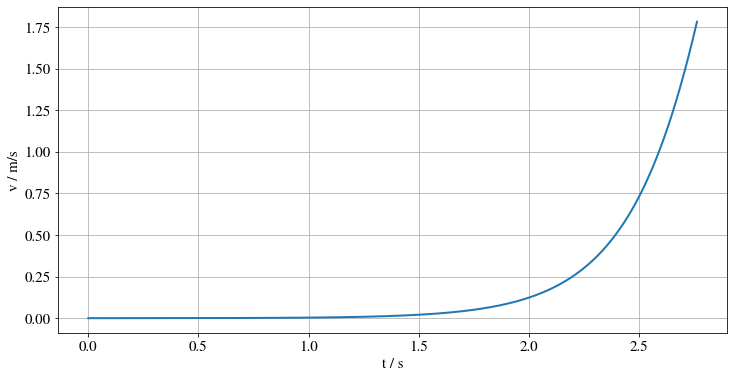

In [89]:
plt.plot(ts, vs)
plt.xlabel("t / s")
plt.ylabel("v / m/s")
plt.grid()
plt.show()

0.00022412466640009399


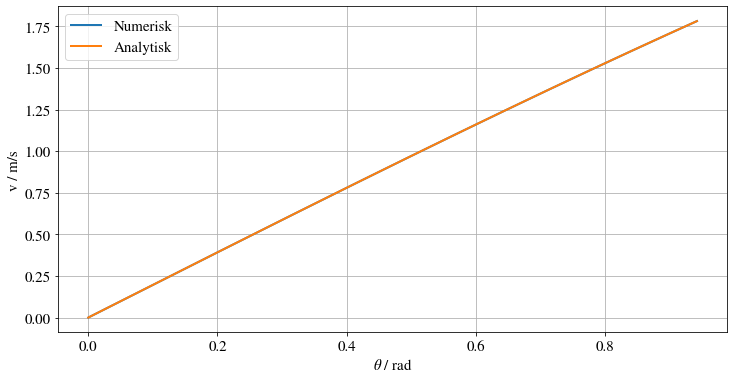

In [90]:
plt.plot(thetas, vs, label="Numerisk")
plt.plot(theta_analytic, v_analytic, label = "Analytisk")
plt.xlabel(r"$\theta$ / rad")
plt.ylabel("v / m/s")
plt.legend()
plt.grid()
print(vs[-1] - v_analytic[-1])

Text(0, 0.5, 'E / J')

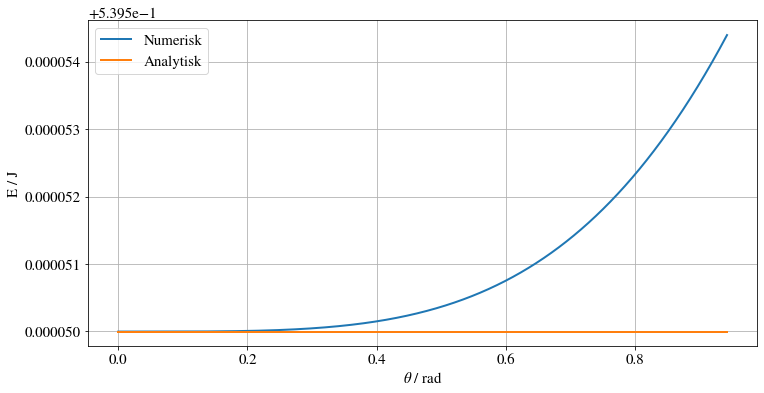

In [91]:
K_num = 1/2 * m * (1+c) * vs**2
V_num = m * g*(R+r)*np.cos(thetas)

plt.plot(thetas, K_num +V_num, label ="Numerisk")
plt.plot(theta_analytic, E_analytic, label="Analytisk")
plt.legend()
plt.grid()
plt.xlabel(r"$\theta$ / rad")
plt.ylabel("E / J")

0.9502537732512442
0.8299624091141484
Sluttvinkel: 54.4


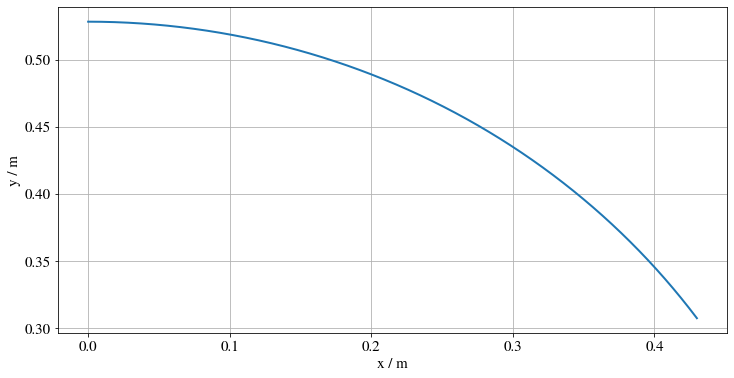

[0.05184585 0.05184585 0.05184585 ... 0.05127204 0.05127203 0.05127203]
[0.05184585 0.05184585 0.05184585 ... 0.05127204 0.05127203 0.05127203]


In [76]:
r = 0.0285             #[m] Avstanden fra banen opp til massesenter av objektet
R = 0.5              #[m] Radius til banen
m = 0.1              #[kg] Massen til objektet
g = 9.81             #[m/s^2] Gravitasjonsakselerasjonen
dt = 0.0001           #[s] tidssteg for eulers metode
theta0 = 0.0001        #[rad] Slippvinkel for objektet (større enn null, ellers ville det ha stått i ro på toppen)
c = 2/5              #Konstant bestemt av treghetsmomentet gjennom massesenteret til objektet.
fk_kinetisk = 0.6     #Friksjonskoeffisient for kinetisk friksjon
fk_statisk = 1        #Friksjonskoeffisient for statisk friksjon



#Funksjon som regner ut normalkraften fra banen på objektet ved en vinkel langs banen og returnerer denne [N].  
#Parametre:
#theta: [rad] vinkelen objeket befinner seg ved. theta=0 settes for toppen av banen
#g: [m/s^2] Gravitasjonsakselerasjonen
#R: [m] Radius til banen
#v: [m/s] Hastighet til objektet
#m: [kg] masse til objektet
#r:  [m] Avstanden fra banen opp til massesenter av objektet
def N(theta, v, m, g, R, r):
    return m*g*np.cos(theta)-m*(v**(2))/(R+r)


#Funksjon som finner rullefriksjonen ved en vinkel langs banen og returnerer denne. [N].
#Parametre:
#theta: [rad] vinkelen objeket befinner seg ved. theta=0 settes for toppen av banen
#g: [m/s^2] Gravitasjonsakselerasjonen
#m: [kg] masse til objektet
#c: Konstant bestemt av treghetsmomentet gjennom massesenteret til objektet.
def f(theta, c, g, m):
    return (c*g*m*np.sin(theta))/(c+1) 

def euler_step_rulling(ts, dt, g, thetas, r, R, vs):
    ts.append(ts[-1] + dt)
    thetas.append(thetas[-1] + vs[-1]*dt/(r+R))
    vs.append(vs[-1] + (g*np.sin(thetas[-2]))/(1+c)*dt)
    
def euler_step_sluring(ts, dt, g, thetas, r, R, vs, m):
    ts.append(ts[-1] + dt)
    thetas.append(thetas[-1] + vs[-1]*dt/(r+R))
    frik_sluring = fk_kinetisk*N(thetas[-2], vs[-1], m, g, R, r)
    vs.append(vs[-1] + (g*np.sin(thetas[-2])/(1+c)-(frik_sluring/m))*dt)
                
def euler(dt, g, r, R, theta0, fk_statisk, m, c):
    ts = [0]
    vs = [0]
    thetas = [theta0]
    while(N(thetas[-1], vs[-1], m, g, R, r)*fk_statisk > f(thetas[-1], c, g, m)):
        euler_step_rulling(ts, dt, g, thetas, r, R, vs)
    
    theta_overgang = thetas[-1]
    
    while(N(thetas[-1], vs[-1], m, g, R, r)>0):
        euler_step_sluring(ts, dt, g, thetas, r, R, vs, m)
    
    return np.array(thetas), np.array(vs), np.array(ts), theta_overgang


#Bruker Eulers metode til å finne vinkel, hastighet og tid for objektet langs banen
thetas, vs, ts, theta_overgang = euler(dt, g, r, R, theta0, fk_statisk, m, c)

#Finner x-posisjon, y-posisjon fra den numeriske løsningen
xs = (R+r)*np.sin(thetas)    
ys = (r+R)*np.cos(thetas)

#Regner ut numerisk og analytisk mekansik energi
E_num = 1/2 * m *(1+c) * vs**2 + m*g*(R+r)*np.cos(thetas)
# E_analytic = 1/2 * m* ((1+c)*v_analytic**2 + 2*g*(R+r)*np.cos(theta_analytic))
K_num = 1/2 * m * (1+c) * vs**2
V_num = m * g*(R+r)*np.cos(thetas)


print(thetas[-1])
print(theta_overgang)
print(f"Sluttvinkel: {thetas[-1]*180/np.pi:.03}")
plt.plot(xs, ys)
plt.xlabel("x / m")
plt.ylabel("y / m")
plt.grid()
plt.show()

print(K_num+V_num)
print(E_num)

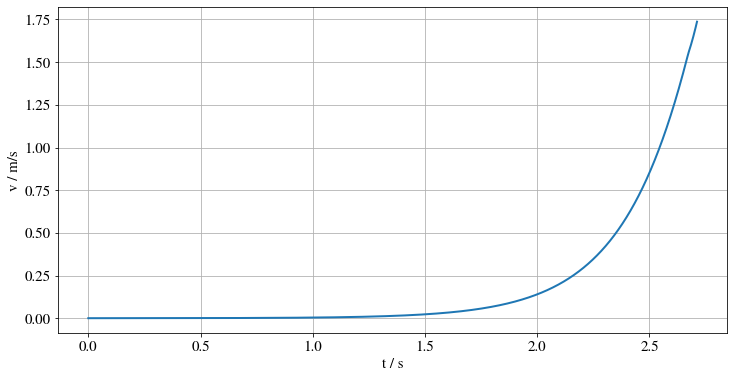

In [77]:
plt.plot(ts, vs)
plt.xlabel("t / s")
plt.ylabel("v / m/s")
plt.grid()
plt.show()

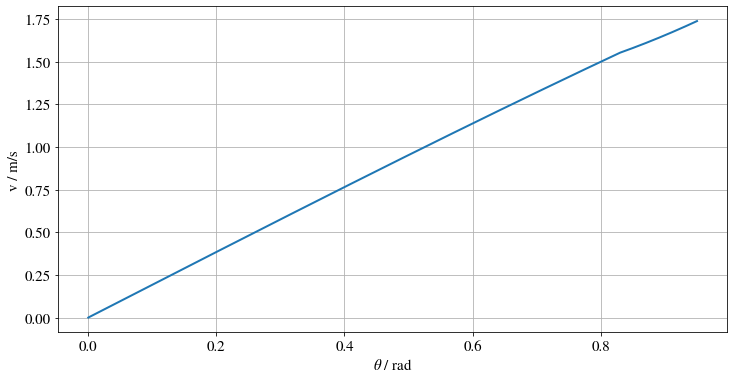

In [78]:
plt.plot(thetas, vs, label="Numerisk")
# plt.plot(theta_analytic, v_analytic, label = "Analytisk")
plt.xlabel(r"$\theta$ / rad")
plt.ylabel("v / m/s")
# plt.legend()
plt.grid()

27120


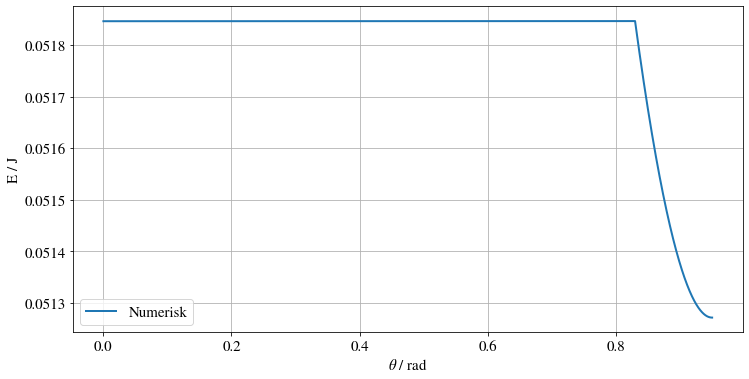

In [79]:
K_num = 1/2 * m * (1+c) * vs**2
V_num = m * g*(R+r)*np.cos(thetas)
# plt.plot(thetas[:26000], K_num[:26000]+V_num[:26000], label ="Numerisk")
plt.plot(thetas, E_num, label="Numerisk")
# plt.plot(thetas, K_num, label="K")
# plt.plot(thetas, V_num, label = "V")
plt.legend()
plt.grid()
plt.xlabel(r"$\theta$ / rad")
plt.ylabel("E / J")
print(len(thetas))